## IS 362 Week 8: Data Set
### By Billy Cole

#### Our project this week is to import a data set called Auto MPG and do some tidying!

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1, 2, 3. Lets import some data!

So lets take some information from the data file and add some headers that where shown in the names file!

I'm also rearranging the file headers to make it easier to manipulate.

In [75]:
auto_header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car name']
auto_data = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header= None, names= auto_header)
cols = auto_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
auto_data = auto_data[cols]
auto_data

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1
5,"""ford galaxie 500""",15.0,8,429.0,198.0,4341.0,10.0,70,1
6,"""chevrolet impala""",14.0,8,454.0,220.0,4354.0,9.0,70,1
7,"""plymouth fury iii""",14.0,8,440.0,215.0,4312.0,8.5,70,1
8,"""pontiac catalina""",14.0,8,455.0,225.0,4425.0,10.0,70,1
9,"""amc ambassador dpl""",15.0,8,390.0,190.0,3850.0,8.5,70,1


#### 4. Now lets replace those question marks.

So some of the entries are filled with question marks instead of the more usable NaN. Also fixing the horsepower numerical issues I was having with my seaborn chart.

In [78]:
auto_data = auto_data.replace(to_replace='?', value=np.nan)
auto_data['horsepower'] = auto_data['horsepower'].astype(float)

#### 5. Now let's change the locations.

So the locations are 1 = USA, 2 = ASIA and 3 = EUROPE.

In [52]:
auto_data['origin'].replace(1, 'USA', inplace=True)
auto_data['origin'].replace(2, 'ASIA', inplace=True)
auto_data['origin'].replace(3, 'EUROPE', inplace=True)

auto_data

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA
5,"""ford galaxie 500""",15.0,8,429.0,198.0,4341.0,10.0,70,USA
6,"""chevrolet impala""",14.0,8,454.0,220.0,4354.0,9.0,70,USA
7,"""plymouth fury iii""",14.0,8,440.0,215.0,4312.0,8.5,70,USA
8,"""pontiac catalina""",14.0,8,455.0,225.0,4425.0,10.0,70,USA
9,"""amc ambassador dpl""",15.0,8,390.0,190.0,3850.0,8.5,70,USA


#### 6. Let's visualize cyclinders.

Let's put the distribution of cyclinders into a bar graph.

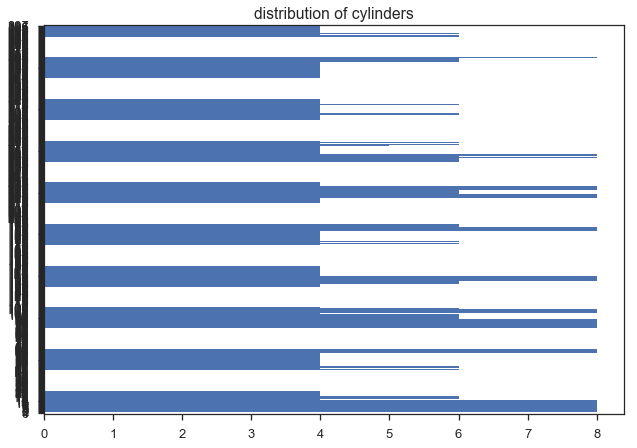

In [53]:
auto_data.groupby("cylinders")
auto_data['cylinders'].plot(kind='barh', title="distribution of cylinders")

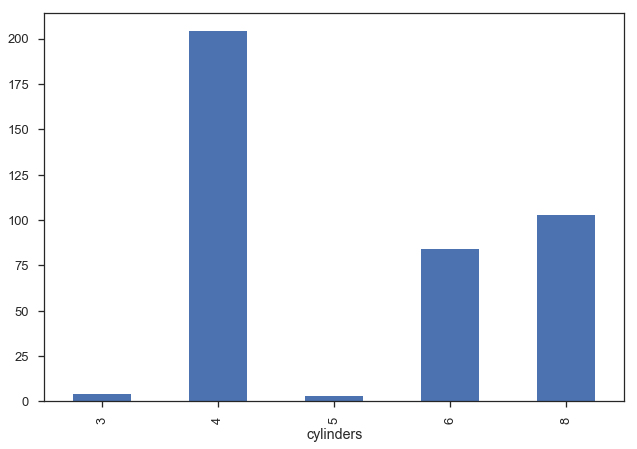

In [54]:
auto_data.groupby("cylinders").size().plot(kind="bar")

#### 7. Lets now data into a scatterplot.

Lets put the weight to power ratio into a data plot

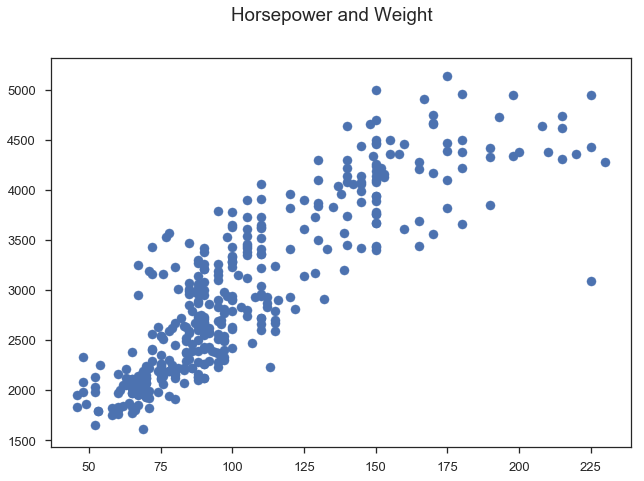

In [55]:
plt.scatter(auto_data['horsepower'], auto_data['weight'])
plt.suptitle('Horsepower and Weight')
plt.show()

#### 8. Using Seaborn to show the data.

Lets take three aspects of the data and show a beautiful chart!

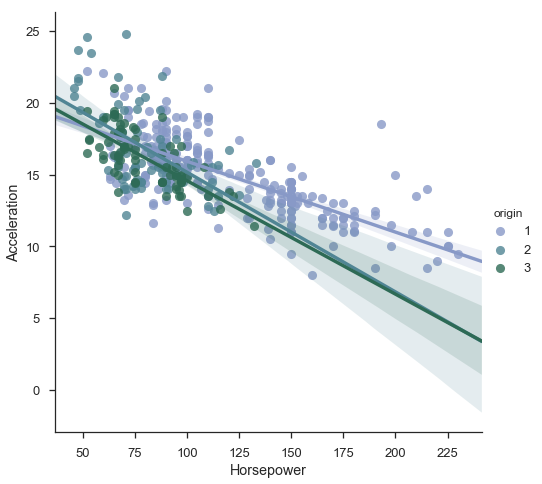

In [83]:
sns.set(style="ticks", context="talk")
a_h_data = auto_data[['horsepower', 'acceleration', 'origin']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='horsepower', y='acceleration', hue='origin', data=a_h_data, palette=pal, size=7)
g.set_axis_labels("Horsepower", "Acceleration")
sns.plt.show()

The chart shows that strangly that acceleration and horsepower do not grow together. Thats because with more horse weight effects acceleration.

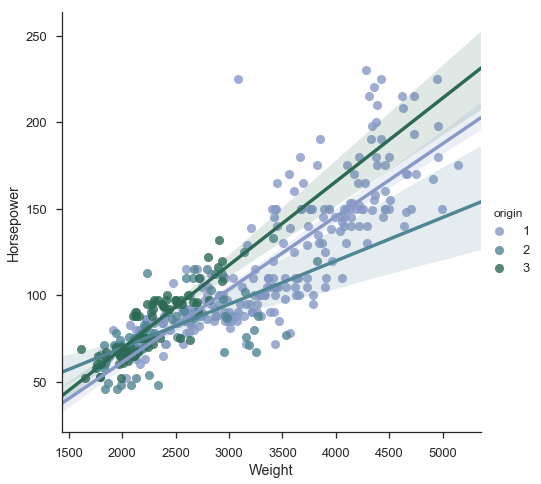

In [84]:
sns.set(style="ticks", context="talk")
w_h_data = auto_data[['weight', 'horsepower', 'origin']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='weight', y='horsepower', hue='origin', data=w_h_data, palette=pal, size=7)
g.set_axis_labels("Weight", "Horsepower")
sns.plt.show()

So the Horsepower gains, so does the weight.

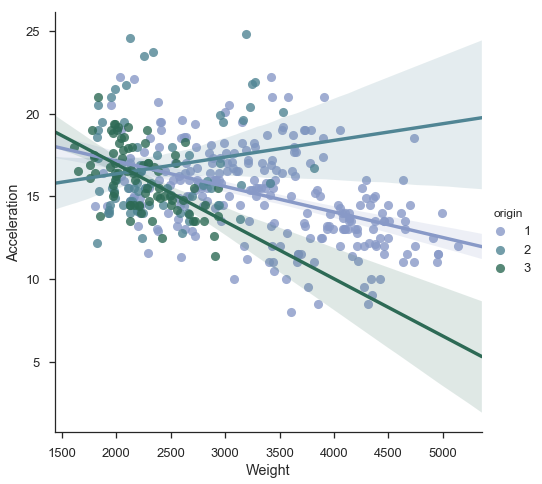

In [85]:
sns.set(style="ticks", context="talk")
w_a_data = auto_data[['weight', 'acceleration', 'origin']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='weight', y='acceleration', hue='origin', data=w_a_data, palette=pal, size=7)
g.set_axis_labels("Weight", "Acceleration")
sns.plt.show()

It seems that the weight ratio 